### **Exploratory Data Analysis**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')

df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')

df.drop(columns='Unnamed: 0',inplace = True)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna()

In [4]:
df_btc = df[df['name'] == 'Bitcoin'][['date','price']].rename(columns = {'price':'bitcoin_price'})

In [7]:
market = df.groupby('date')['price'].sum().reset_index().rename(columns = {'price':'total_market'})

In [13]:
merge = pd.merge(df_btc,market,on = 'date')
merge

,date,bitcoin_price,total_market
0,2013-04-29,144.54,148.923900
1,2013-04-30,139.00,143.296490
2,2013-05-01,116.99,120.791010
3,2013-05-02,105.21,108.581980
4,2013-05-03,97.75,100.794910
...,...,...,...
4482,2025-08-06,114153.00,119494.045671
4483,2025-08-07,114379.00,119767.341209
4484,2025-08-09,116419.00,122288.504621
4485,2025-08-10,118147.00,124163.700760


Text(0.5, 1.0, 'Total Crypto Market Volume Over Time')

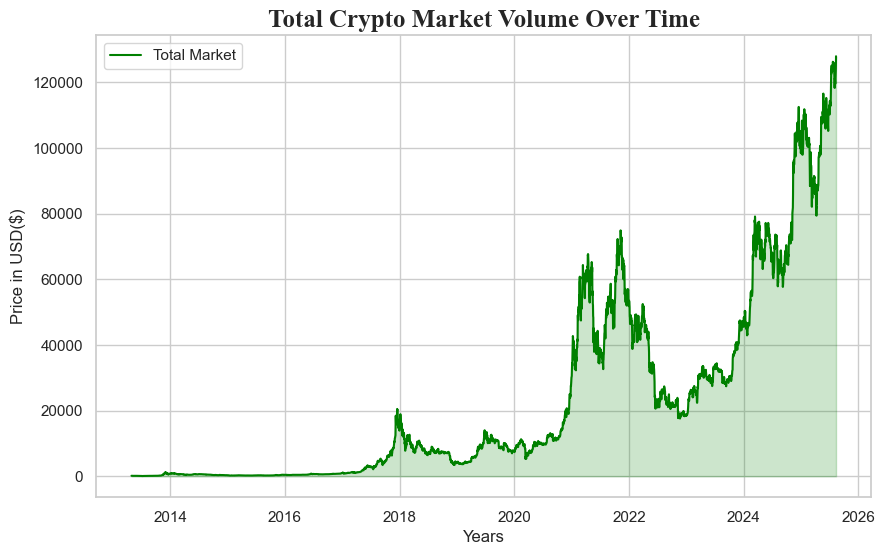

In [34]:
plt.figure(figsize = (10,6))
sns.lineplot(data = merge,x = 'date',y = 'total_market',color = 'green',label = 'Total Market')
plt.fill_between(merge['date'], merge['total_market'], color='green', alpha=0.2)
plt.ylabel('Price in USD($)')
plt.xlabel('Years')
plt.title("Total Crypto Market Volume Over Time",fontsize = 18,fontfamily = 'Times New Roman',fontweight = 'bold')

Text(0.5, 1.0, 'Bitcoin vs Total Crypto Market Price Over Time')

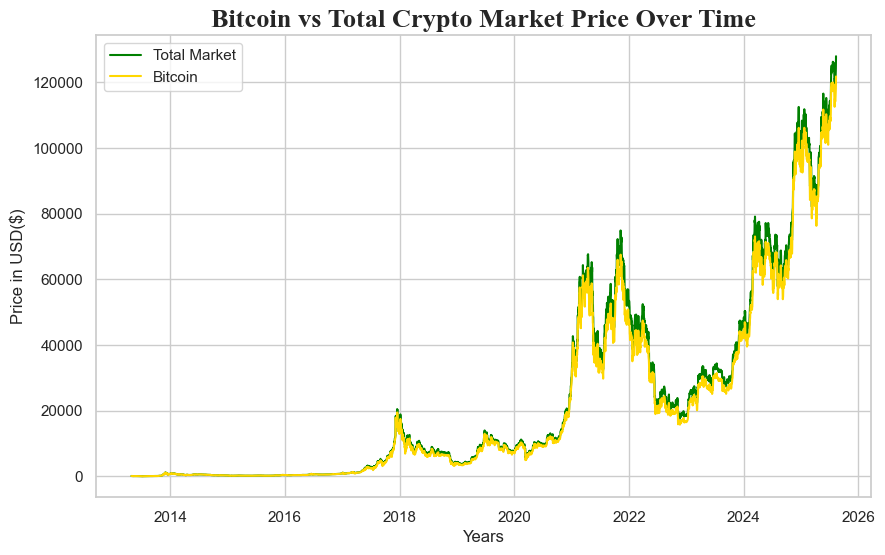

In [36]:
plt.figure(figsize = (10,6))
sns.lineplot(data = merge,x = 'date',y = 'total_market',color = 'green',label = 'Total Market')
sns.lineplot(data = merge,x = 'date',y ='bitcoin_price',color = 'gold',label = 'Bitcoin')
plt.ylabel('Price in USD($)')
plt.xlabel('Years')
plt.title("Bitcoin vs Total Crypto Market Price Over Time",fontsize = 19,fontfamily = 'Times New Roman',fontweight = 'bold')